In [256]:
import seaborn as sns
import numpy as np
import pandas as pd
from joblib import load
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
modes = ["model", "dummy"]
pattern = ["blue", "orange"]

stats_m = {}
for mode in modes:
    stats_m[mode] = load(f"data/{mode}_stats.joblib")
    
stats_g = {}


In [262]:
for mode in modes:
    print(mode)
    stats_m[mode] = stats_m[mode][:7000]
    stats = stats_m[mode]
    print(stats[-2:])
    print(len(stats))
    print(sum(int(s is None) for s in stats))


model
[{'team_a': [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)], 'team_b': [(0.0, 0.0), (-0.43397138, -0.43397138), (0.38783538, 0.38783538), (0.0, 0.0), (0.046624165, 0.046624165)], 'sigmoid': 0.4998779566982784, 'skill gap': -0.0004881732165813446, 'sigmoid_opt': 0.4998779566982784, 'skill gap_opt': -0.0004881732165813446, 'waiting times': [58.0, 53.0, 51.0, 34.0, 5.0, 57.0, 53.0, 42.0, 37.0, 0.0], 'pool max time': 58.0, 'pool mean time': 22.96928327645051, 'pool size': 293}, {'team_a': [(-1.3504883, -1.3504883), (0.0, 0.0), (-0.096964695, -0.096964695), (0.0, 0.0), (0.09784815, 0.09784815)], 'team_b': [(-0.5204239, -0.5204239), (-0.1938557, -0.1938557), (0.0, 0.0), (-0.35763255, -0.35763255), (-0.2722558, -0.2722558)], 'sigmoid': 0.49864077716610655, 'skill gap': -0.005436904728412628, 'sigmoid_opt': 0.49864077716610655, 'skill gap_opt': -0.005436904728412628, 'waiting times': [58.0, 30.0, 20.0, 9.0, 0.0, 58.0, 40.0, 15.0, 13.0, 5.0], 'pool max time': 58.0, 'pool mean

7000
7000


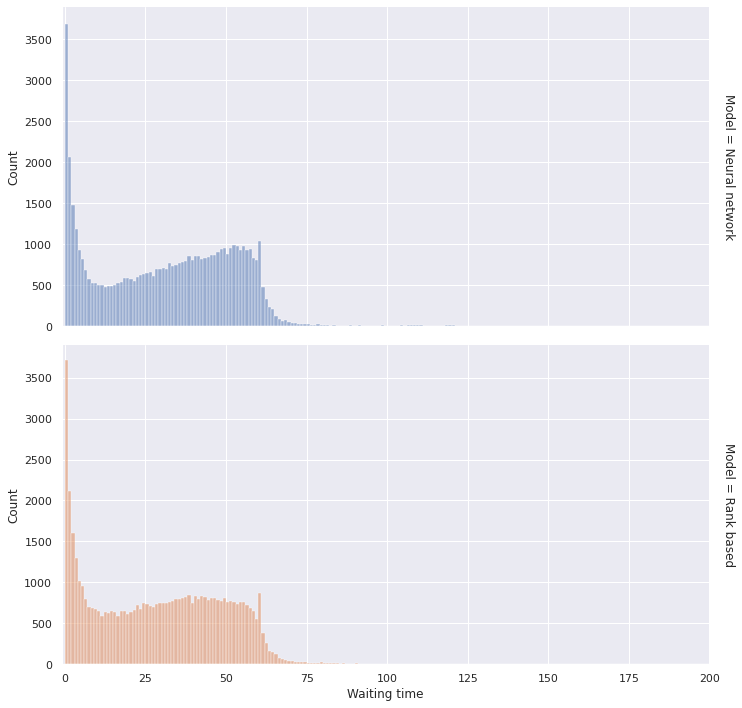

In [263]:
df = {
    "Waiting time": [],
    "Model": []
}

m = {
    "dummy": "Rank based",
    "model": "Neural network"
}


for mode in modes:
    stats = stats_m[mode]
    print(len(stats))
    x = np.array([s["waiting times"] for s in stats if s is not None]).flatten().tolist()
    df["Waiting time"].extend(x)
    df["Model"].extend([m[mode] for _ in range(len(x))])

df = pd.DataFrame(df)

plot = sns.displot(
    df, x="Waiting time", facet_kws=dict(margin_titles=True, xlim=(-1, 200)),
    hue="Model",
    row="Model",
    bins=[i for i in range(201)],
    height=5, aspect=11/5,
)
plot._legend.remove()

fig = plot.fig
fig.savefig("waiting_histogram.png") 

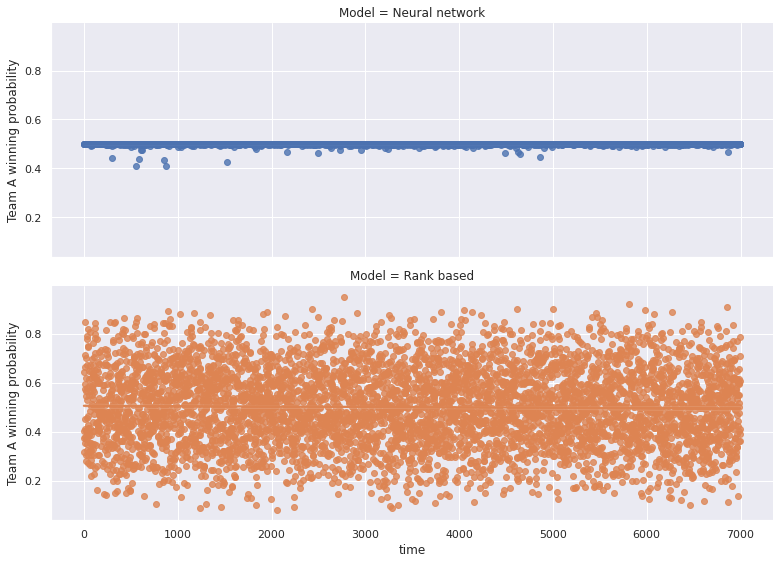

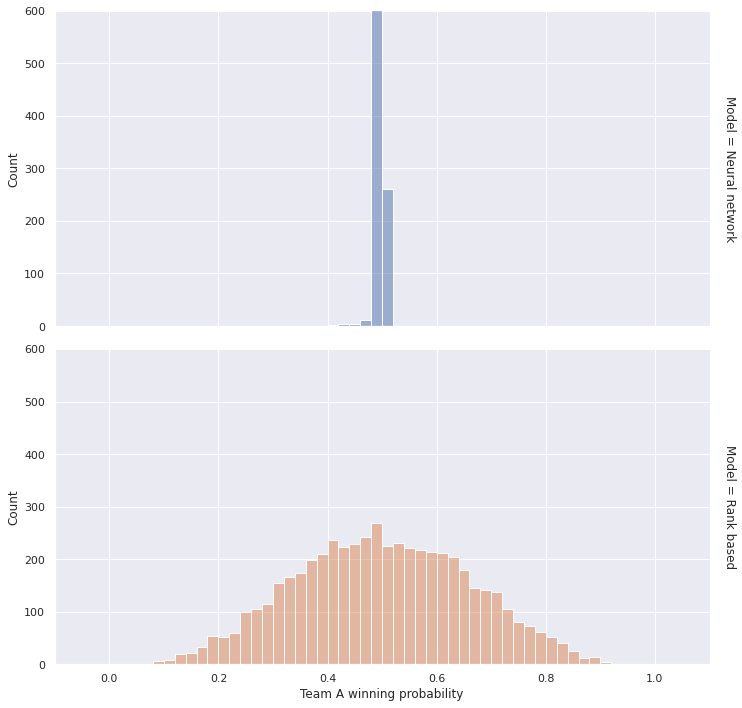

In [264]:
df = {
    "time": [],
    "Team A winning probability": [],
    "Model": []
}

m = {
    "dummy": "Rank based",
    "model": "Neural network"
}

for mode in modes:
    stats = stats_m[mode]
    x = np.array([[t, s["sigmoid"], m[mode]] for t, s in enumerate(stats) if s is not None], dtype=object)
    df["time"].extend(x[:, 0].tolist())
    df["Team A winning probability"].extend(x[:, 1].tolist())
    df["Model"].extend(x[:, 2].tolist())

df = pd.DataFrame(df)
    

g = sns.lmplot(
    data=df,
    row="Model",
    hue="Model",

    x="time", y="Team A winning probability",
    height=4, aspect=11/4,
    # facet_kws=dict(ylim=(0.499, 0.5001))
)

plot = sns.displot(
    df, x="Team A winning probability", facet_kws=dict(margin_titles=True, xlim=(-0.1, 1.1), ylim=(0, 600)),
    bins=[i / 50 for i in range(51)],
    height=5, aspect=11/5,
    row="Model",
    hue="Model",
)
plot._legend.remove()

fig = plot.fig
fig.savefig("prob_histogram.png") 

model
dummy


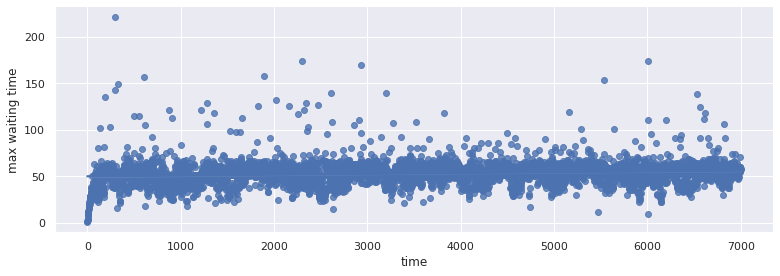

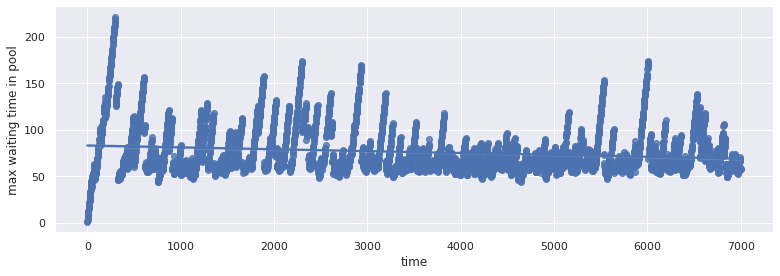

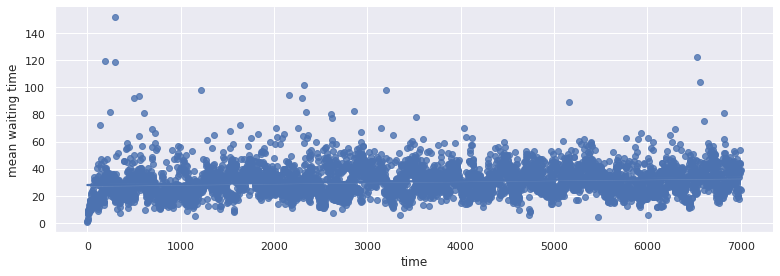

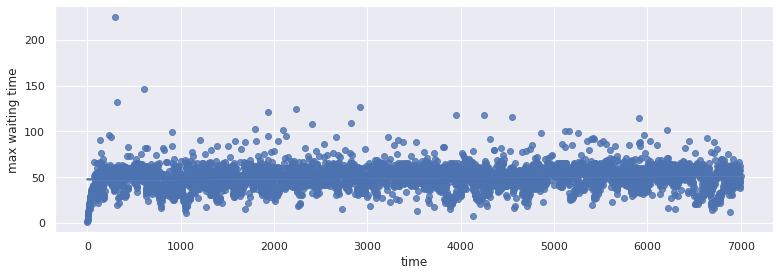

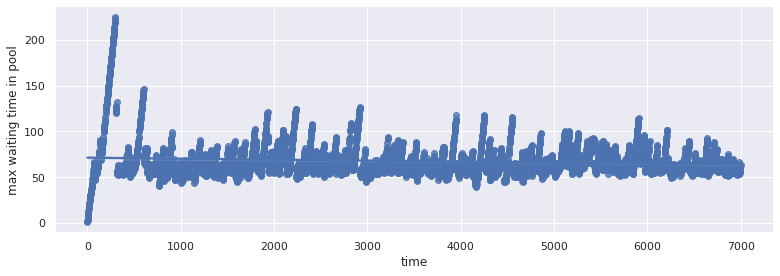

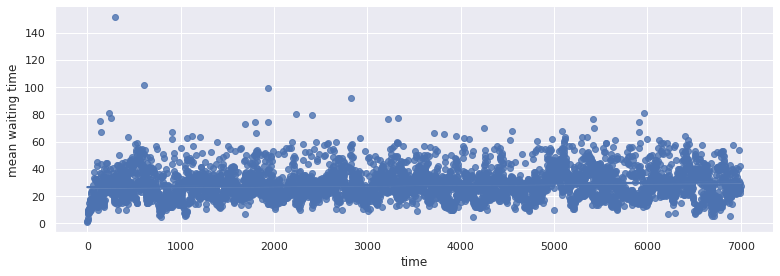

In [265]:
for mode in modes:
    print(mode)
    stats = stats_m[mode]

    x = [(t, np.array(s["waiting times"]).max(), s["pool max time"], np.array(s["waiting times"]).mean()) for t, s in enumerate(stats) if s is not None]
    df = {
        "time": [i[0] for i in x],
        "max waiting time": [i[1] for i in x],
        "max waiting time in pool": [i[2] for i in x],
        "mean waiting time": [i[3] for i in x],
    }
    df = pd.DataFrame(df)
    g = sns.lmplot(
        data=df,
        x="time", y="max waiting time",
        height=4, aspect=11/4
    )
    g = sns.lmplot(
        data=df,
        x="time", y="max waiting time in pool",
        height=4, aspect=11/4
    )
    g = sns.lmplot(
        data=df,
        x="time", y="mean waiting time", 
        height=4, aspect=11/4
    )

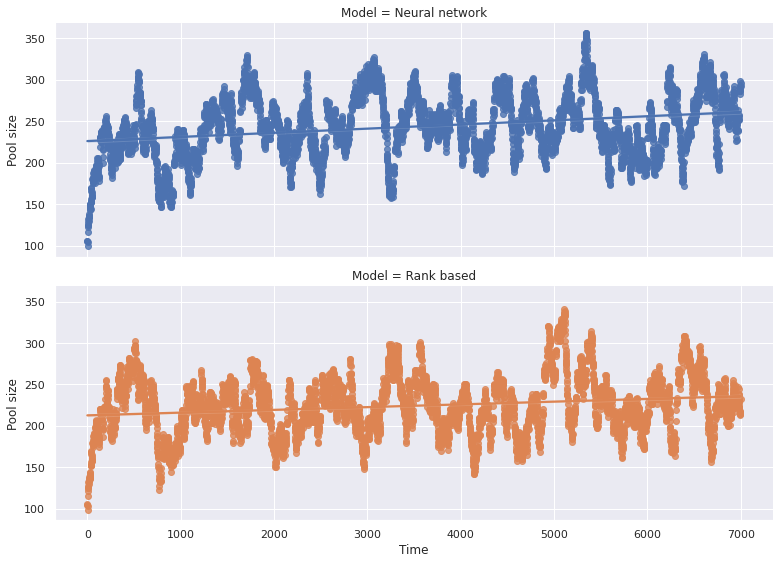

In [266]:
df = {
    "Time": [],
    "Pool size": [],
    "Model": []
}

m = {
    "dummy": "Rank based",
    "model": "Neural network"
}

for mode in modes:
    stats = stats_m[mode]
    x = np.array([[t, s["pool size"]] for t, s in enumerate(stats) if s is not None], dtype=object)
    df["Time"].extend(x[:, 0].tolist())
    df["Pool size"].extend(x[:, 1].tolist())
    df["Model"].extend([m[mode] for _ in range(len(x))])

df = pd.DataFrame(df)
    
plot = sns.lmplot(
    data=df,
    hue="Model",
    row="Model",
    x="Time", y="Pool size",
    height=4, aspect=11/4,
)

fig = plot.fig
fig.savefig("pool_size.png") 